<a href="https://colab.research.google.com/github/mc-robinson/DeOldify/blob/master/DeOldify_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeOldify on Colab #

This notebook shows how to get your own version of [DeOldify](https://github.com/jantic/DeOldify) working on Google Colab. A lot of the initial steps are just installs -- but these are also the steps that can make running the model a tedious exercise.

Initially, one must `pip install` a few dependencies, then `wget` is used to download the appropriate picture data.

NECESSARY PRELIMINARY STEP: Please make sure you have gone up to the "Runtime" menu above and "Change Runtime Type" to Python3 and GPU.

I hope you have fun, and thanks to Jason Antic for this awesome tool!

-Matt Robinson, <matthew67robinson@gmail.com>

NEW: You can now load your files from you own Drive, check the last cell of the notebook for more information.

In [56]:
!git clone https://github.com/jantic/fastai.git

Cloning into 'fastai'...
remote: Enumerating objects: 6639, done.
remote: Total 6639 (delta 0), reused 0 (delta 0), pack-reused 6639
Receiving objects: 100% (6639/6639), 273.52 MiB | 29.22 MiB/s, done.
Resolving deltas: 100% (4186/4186), done.
Checking out files: 100% (264/264), done.


In [57]:
cd fastai/

/content/DeOldify/fastai


In [58]:
# get rid of torch requirements
# they cannot be used with pip
%%writefile requirements.txt

bcolz>=1.1.2
bleach>=2.0.0
certifi>=2016.2.28
cycler>=0.10.0
decorator>=4.1.2
entrypoints>=0.2.3
graphviz>=0.8.2
html5lib>=0.999999999
ipykernel>=4.6.1
ipython>=6.2.0
ipython-genutils>=0.2.0
ipywidgets>=7.0.1
isoweek>=1.3.3
jedi>=0.10.2
Jinja2>=2.9.6
jsonschema>=2.6.0
jupyter>=1.0.0
jupyter-client>=5.1.0
jupyter-console>=5.2.0
jupyter-core>=4.3.0
MarkupSafe>=1.0
matplotlib>=2.0.2
mistune>=0.7.4
nbconvert>=5.3.1
nbformat>=4.4.0
notebook>=5.1.0
numpy>=1.13.1
olefile>=0.44
opencv-python>=3.3.0.10
pandas>=0.20.3
pandas_summary>=0.0.41
pandocfilters>=1.4.2
pexpect>=4.2.1
pickleshare>=0.7.4
Pillow>=4.2.1
prompt-toolkit>=1.0.15
Pygments>=2.2.0
pyparsing>=2.2.0
pytest>=3.5.0
python-dateutil>=2.6.1
pytz>=2017.2
PyYAML>=3.12
pyzmq>=16.0.2
qtconsole>=4.3.1
scipy>=0.19.1
seaborn>=0.8.1
simplegeneric>=0.8.1
six>=1.11.0
sklearn_pandas>=1.6.0
terminado>=0.6
testpath>=0.3.1
tornado>=4.5.2,<5
tqdm>=4.15.0
traitlets>=4.3.2
wcwidth>=0.1.7
webencodings>=0.5.1
widgetsnbextension>=3.0.3
spacy>=2.0.11

Overwriting requirements.txt


In [59]:
%%writefile setup.py

# coding: utf-8

""" Setup script for installing fastai """

#from distutils.core import setup
from setuptools import setup

setup(
    name = "fastai",
    packages = ['fastai', 'fastai/models', 'fastai/models/cifar10'],
    version = '0.7.0',
    description = "The fastai deep learning and machine learning library.",
    author = "Jeremy Howard and contributors",
    author_email = "info@fast.ai",
    license = "Apache License 2.0",
    url = "https://github.com/fastai/fastai",
    download_url =  'https://github.com/fastai/fastai/archive/0.7.0.tar.gz',
    install_requires =
     ['bcolz', 'bleach', 'certifi', 'cycler', 'decorator', 'entrypoints', 'feather-format', 'graphviz', 'html5lib',
      'ipykernel', 'ipython', 'ipython-genutils', 'ipywidgets', 'isoweek', 'jedi', 'Jinja2', 'jsonschema', 'jupyter',
      'MarkupSafe', 'matplotlib', 'numpy', 'opencv-python', 'pandas',
      'pandas_summary', 'pickleshare', 'Pillow', 'plotnine', 'Pygments', 'pyparsing', 'python-dateutil', 'pytz', 'PyYAML', 'pyzmq', 'scipy',
      'seaborn', 'simplegeneric', 'sklearn_pandas', 'testpath', 'tornado', 'tqdm',
      'traitlets', 'wcwidth', 'webencodings', 'widgetsnbextension'],
    keywords = ['deeplearning', 'pytorch', 'machinelearning'],
    classifiers = ['Development Status :: 3 - Alpha',
                   'Programming Language :: Python',
                   'Programming Language :: Python :: 3.6',
                   'Topic :: Scientific/Engineering :: Artificial Intelligence']
)

Overwriting setup.py


In [60]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

0.4.1
True


In [61]:
!pip install torchtext==0.2.3

In [62]:
!pip install -e .

Obtaining file:///content/DeOldify/fastai
  Found existing installation: fastai 0.7.0
    Can't uninstall 'fastai'. No files were found to uninstall.
  Running setup.py develop for fastai


In [0]:
import fastai
from fastai import *

In [64]:
!pip install jupyterlab

In [65]:
cd ..

/content/DeOldify


In [66]:
!git clone https://github.com/jantic/DeOldify.git

Cloning into 'DeOldify'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 578 (delta 53), reused 47 (delta 24), pack-reused 479
Receiving objects: 100% (578/578), 65.29 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [67]:
cd DeOldify/

/content/DeOldify/DeOldify


In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [69]:
!pip install tensorboardX

In [70]:
# Doing work so I can access data from my google drive
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Note that the above requires a verification step. It isn't too bad.

In [0]:
# Now download the pretrained weights, which I have saved to my google drive
# note that the id is the ending part of the shareable link url (after open?id=)
# The pretrained weights can be downloaded from https://www.dropbox.com/s/7r2wu0af6okv280/colorize_gen_192.h5
download = drive.CreateFile({'id': '1mRRvS3WIHPdp36G0yc1jC0XI6i-Narv6'})
download.GetContentFile('pretrained_weights.h5')

In [0]:
import multiprocessing
import os
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True

With access to your Google Drive, the "deOldifyImages" directory will be created. Drop there your personal images, and after the full execution of the notebook find the results at its subdirectory "results"

In [75]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir "/content/drive/My Drive/deOldifyImages"
!mkdir "/content/drive/My Drive/deOldifyImages/results"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/deOldifyImages’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/deOldifyImages/results’: File exists


In [0]:
# workaround for saving images from colab (source https://stackoverflow.com/questions/48547660/attributeerror-module-pil-image-has-no-attribute-register-extensions) 
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [0]:
default_sz=400

netG = Unet34(nf_factor=2).cuda()
load_model(netG, 'pretrained_weights.h5')
netG = netG.eval()

x_tfms = [BlackAndWhiteTransform()]

vis = ModelImageVisualizer(default_sz=default_sz, results_dir="/content/drive/My Drive/deOldifyImages/results")

In [78]:
# download an example picture to try.
# NOTE: All the jpg files cloned from the git repo are corrupted. Must download yourself.
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg" -O "abe2.jpg"

--2018-11-11 20:12:12--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/abe.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13981 (14K) [image/jpeg]
Saving to: ‘abe2.jpg’

abe2.jpg            100%[===================>]  13.65K  --.-KB/s    in 0.007s  

2018-11-11 20:12:12 (2.03 MB/s) - ‘abe2.jpg’ saved [13981/13981]



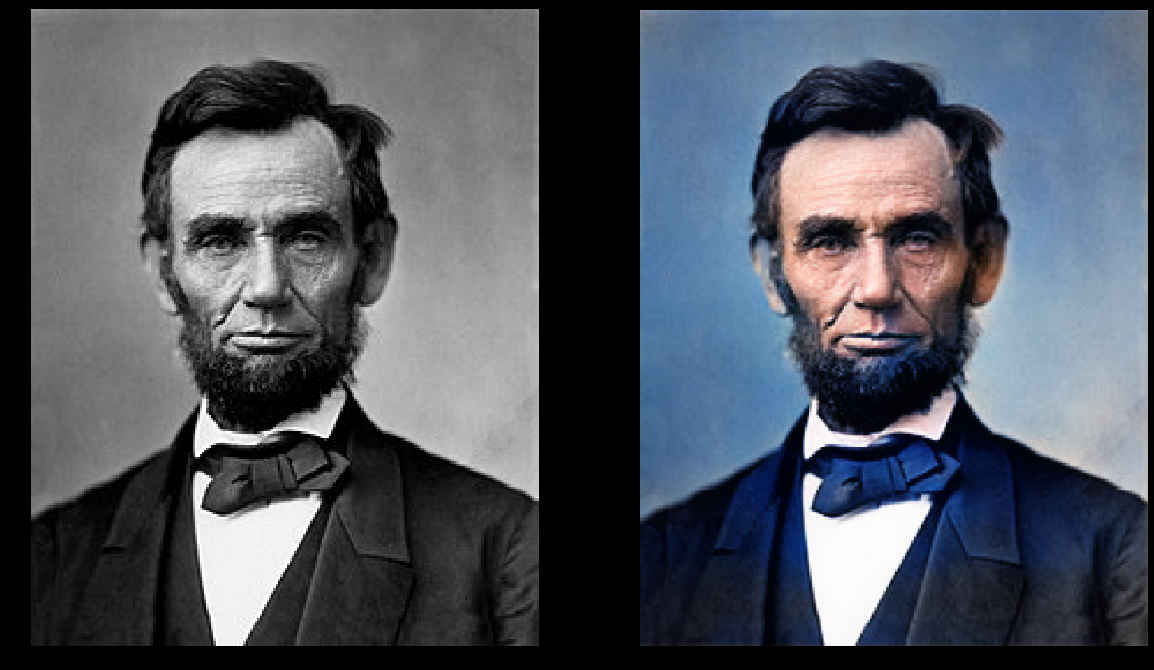

In [79]:
# %matplotlib inline
vis.plot_transformed_image('abe2.jpg', netG, tfms=x_tfms, sz=380)

In [80]:
!wget "https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg" -O "family_TV.jpg"

--2018-11-11 20:12:20--  https://media.githubusercontent.com/media/jantic/DeOldify/master/test_images/TV1930s.jpg
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88662 (87K) [image/jpeg]
Saving to: ‘family_TV.jpg’

family_TV.jpg       100%[===================>]  86.58K  --.-KB/s    in 0.02s   

2018-11-11 20:12:20 (4.59 MB/s) - ‘family_TV.jpg’ saved [88662/88662]



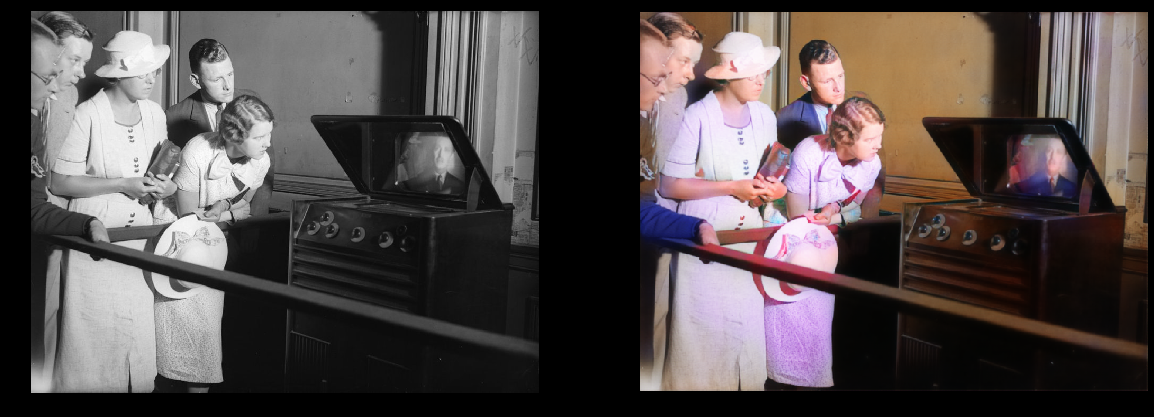

In [81]:
vis.plot_transformed_image('family_TV.jpg', netG, tfms=x_tfms, sz=500)

Let's see how well it does Dorothy before her world turns to color in the Wizard of Oz:

In [82]:
!wget "https://magnoliaforever.files.wordpress.com/2011/09/wizard-of-oz.jpg" -O "Dorothy.jpg"

--2018-11-11 20:12:26--  https://magnoliaforever.files.wordpress.com/2011/09/wizard-of-oz.jpg
Resolving magnoliaforever.files.wordpress.com (magnoliaforever.files.wordpress.com)... 192.0.72.16, 192.0.72.17
Connecting to magnoliaforever.files.wordpress.com (magnoliaforever.files.wordpress.com)|192.0.72.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84039 (82K) [image/jpeg]
Saving to: ‘Dorothy.jpg’

Dorothy.jpg         100%[===================>]  82.07K  --.-KB/s    in 0.06s   

2018-11-11 20:12:26 (1.39 MB/s) - ‘Dorothy.jpg’ saved [84039/84039]



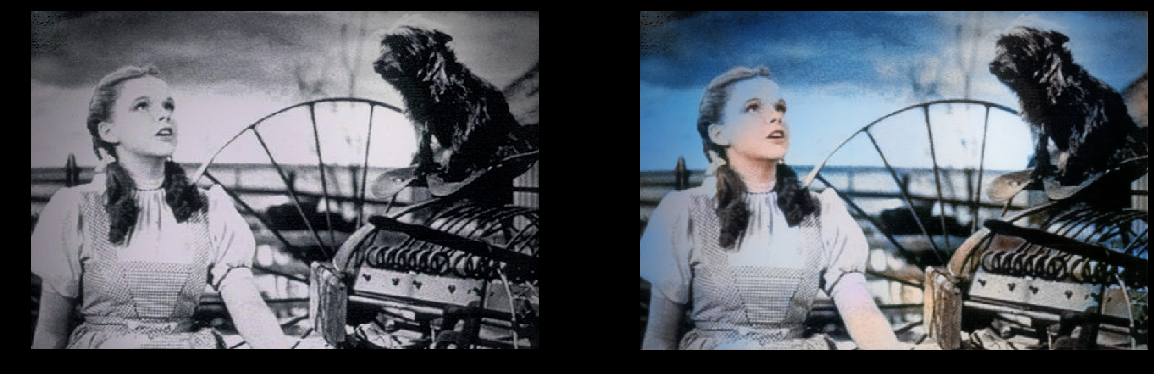

In [83]:
vis.plot_transformed_image('Dorothy.jpg', netG, tfms=x_tfms, sz=500)

Let's now try Butch and Sundance. Famously the last scene ends with a black and white still. So we know what the color was beforehand.

In [84]:
!wget "https://i.ebayimg.com/images/g/HqkAAOSwRLZUAwyS/s-l300.jpg" -O "butch_and_sundance.jpg"

--2018-11-11 20:12:35--  https://i.ebayimg.com/images/g/HqkAAOSwRLZUAwyS/s-l300.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 23.49.13.21, 2600:1409:12:49d::24d4, 2600:1409:12:488::24d4
Connecting to i.ebayimg.com (i.ebayimg.com)|23.49.13.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19247 (19K) [image/jpeg]
Saving to: ‘butch_and_sundance.jpg’

butch_and_sundance. 100%[===================>]  18.80K  --.-KB/s    in 0s      

2018-11-11 20:12:35 (146 MB/s) - ‘butch_and_sundance.jpg’ saved [19247/19247]



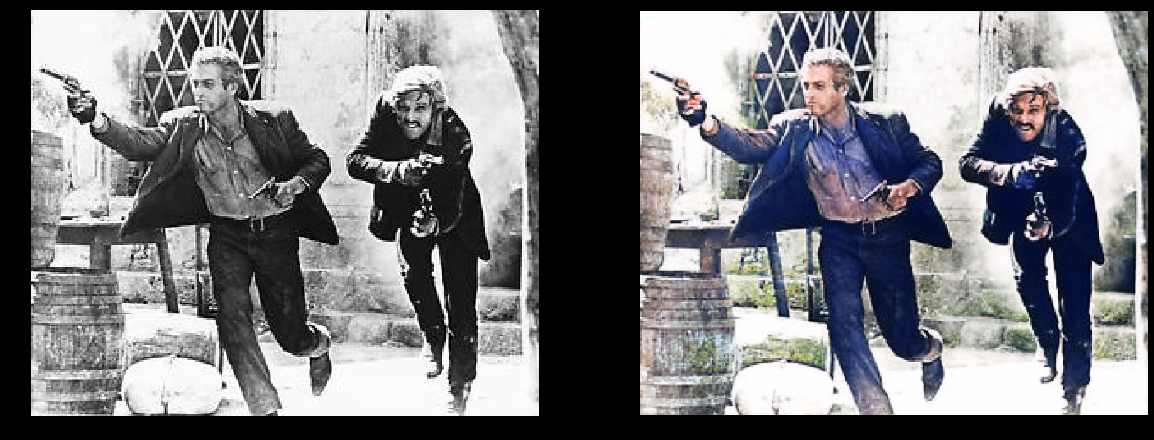

In [85]:
vis.plot_transformed_image('butch_and_sundance.jpg', netG, tfms=x_tfms, sz=500)

Let's get a picture of what they were actually wearing:

In [86]:
!wget "https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg" -O "butch_and_sundance_color.jpg"

--2018-11-11 20:12:42--  https://bethanytompkins.files.wordpress.com/2015/09/freezeframe.jpg
Resolving bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)... 192.0.72.16, 192.0.72.17
Connecting to bethanytompkins.files.wordpress.com (bethanytompkins.files.wordpress.com)|192.0.72.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37162 (36K) [image/jpeg]
Saving to: ‘butch_and_sundance_color.jpg’

butch_and_sundance_ 100%[===================>]  36.29K  --.-KB/s    in 0.03s   

2018-11-11 20:12:42 (1.08 MB/s) - ‘butch_and_sundance_color.jpg’ saved [37162/37162]



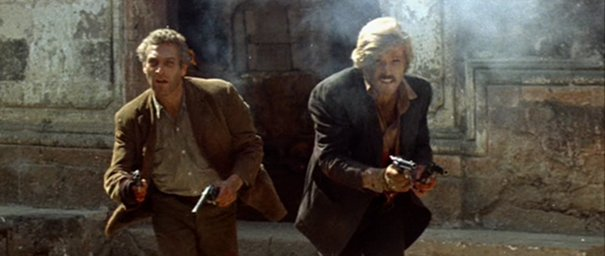

In [87]:
from IPython.display import Image
Image('butch_and_sundance_color.jpg')

If you want to colorise pictures from your drive, drop them in a directory named deOldifyImages (in the root of your drive) and the next cell will save the colorise pictures in deOldifyImages/results.

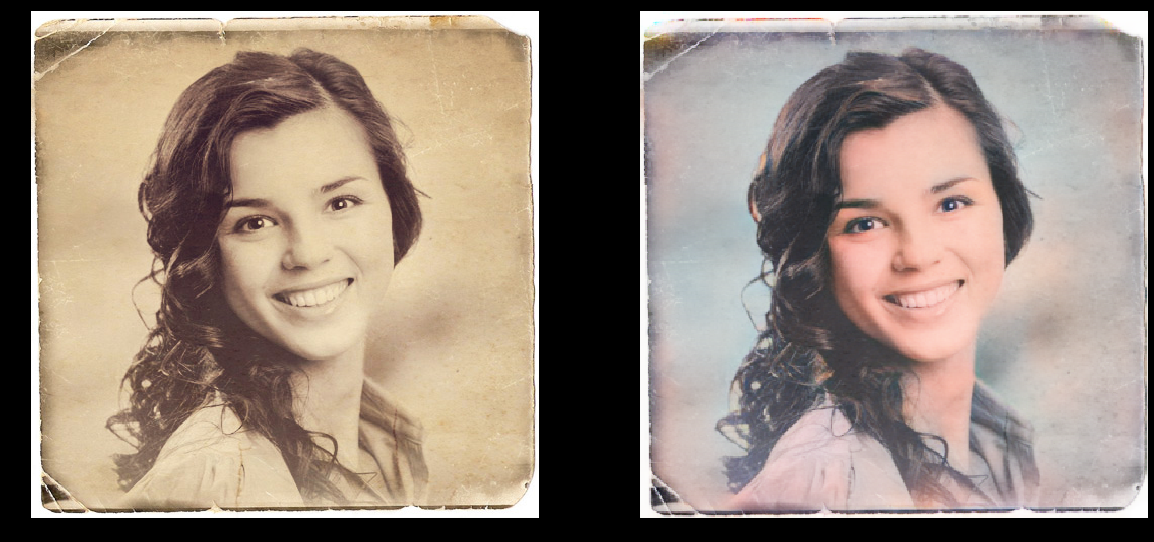

In [88]:
for img in os.listdir("/content/drive/My Drive/deOldifyImages/"):
  img_path = str("/content/drive/My Drive/deOldifyImages/") + img
  if os.path.isfile(img_path):
    vis.plot_transformed_image(img_path, netG, tfms=x_tfms, sz=380)